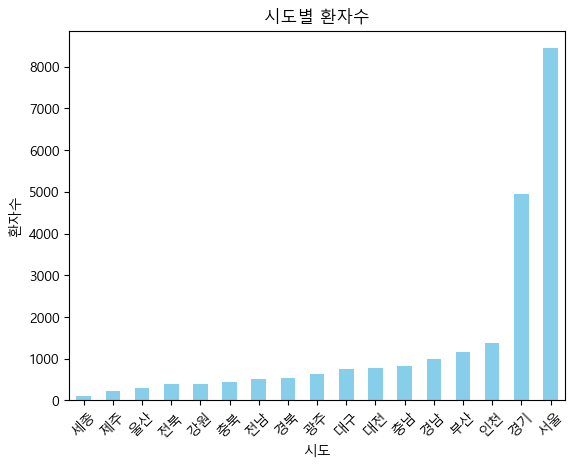

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc


rc('font', family='Malgun Gothic')

file_path = 'obesity2023_2.csv'
data = pd.read_csv(file_path, encoding='cp949')

sido_patient_count = data.groupby('시도')['환자수'].sum().sort_values()
sido_patient_count.plot(kind='bar', color='skyblue', title='시도별 환자수')
plt.xlabel('시도')
plt.ylabel('환자수')
plt.xticks(rotation=45)
plt.show()

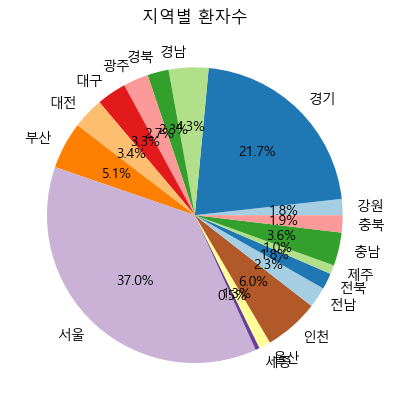

In [18]:
sido_cost_share = data.groupby('시도')['환자수'].sum()
sido_cost_share.plot(kind='pie', autopct='%1.1f%%', title='지역별 환자수', colors=plt.cm.Paired.colors)
plt.ylabel('')
plt.show()

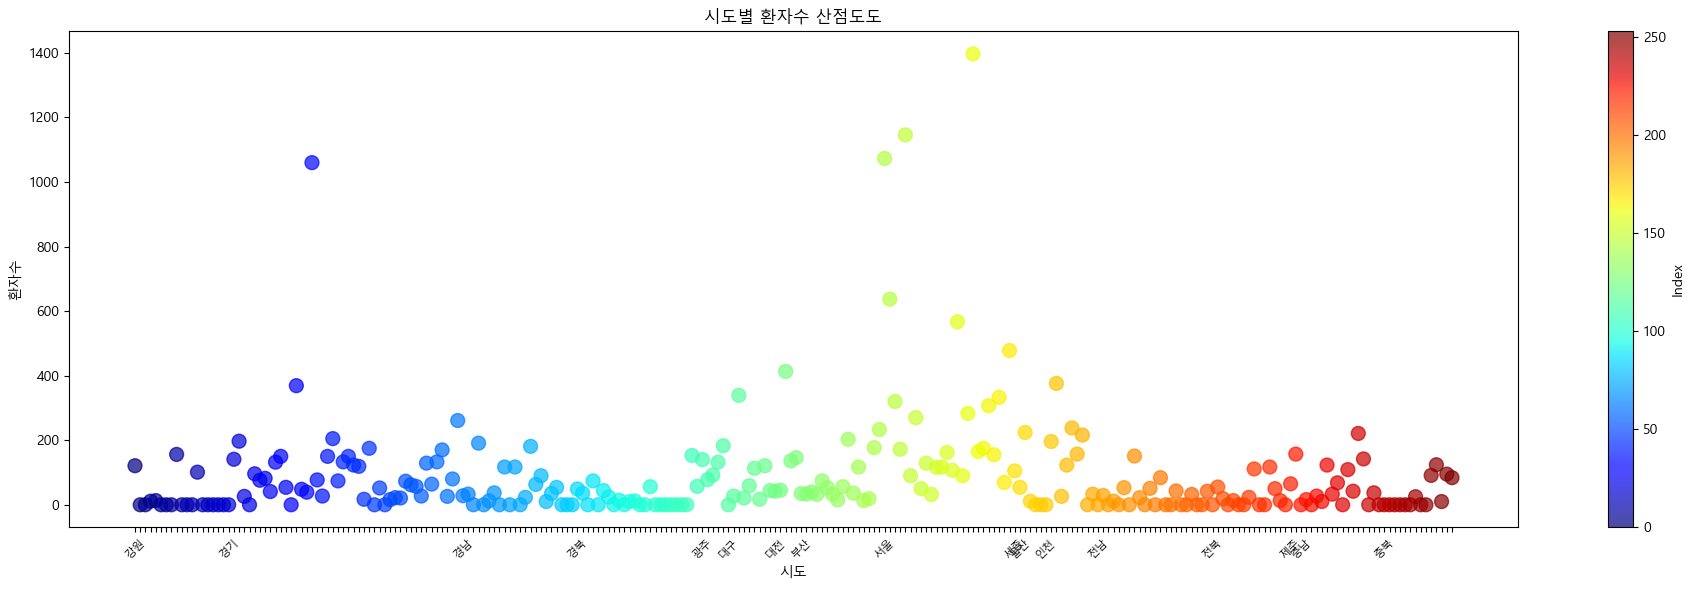

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# 시도-시군구 데이터 생성
data['시도-시군구'] = data['시도'] + '-' + data['시군구']
grouped_data = data.groupby('시도-시군구')['환자수'].sum().reset_index()

# x축: 중복 제거된 시도, y축: 환자 수
x_labels_full = grouped_data['시도-시군구'].str.split('-').str[0]

# 중복 제거된 시도 레이블 생성
x_labels = []
seen = set()
for label in x_labels_full:
    if label not in seen:
        x_labels.append(label)  # 중복되지 않은 경우 추가
        seen.add(label)
    else:
        x_labels.append('')  # 중복된 경우 공백 처리

# y축: 환자수
y = grouped_data['환자수']

# 색상 매핑
colors = range(len(grouped_data))
colormap = 'jet'
size = 100


plt.figure(figsize=(19, 6))
plt.scatter(x=range(len(grouped_data)), y=y, alpha=0.7, c=colors, cmap=colormap, s=size)
plt.title('시도별 환자수 산점도도')
plt.xlabel('시도')
plt.ylabel('환자수')
plt.xticks(ticks=range(len(grouped_data)), labels=x_labels, rotation=45, fontsize=8)  # x축에 중복 제거된 시도만 표시
plt.colorbar(label='Index')
plt.tight_layout()
plt.show()


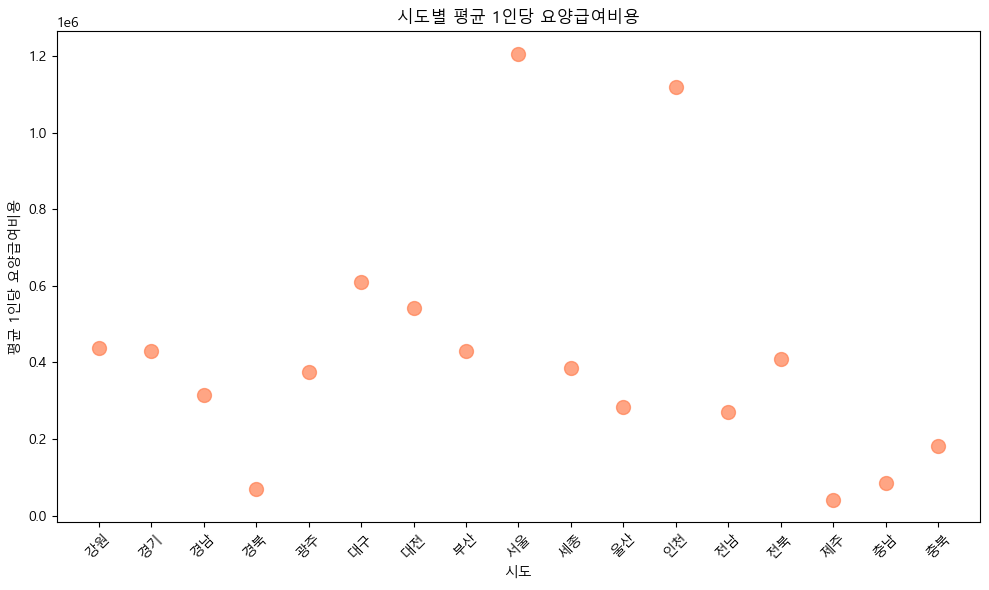

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r'C:\Users\jojeo\Downloads\obesity2023_2.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 1인당 요양급여비용
data['요양급여비용_1인당'] = data['요양급여비용총액'] / data['환자수']

# 시도별 평균 요양급여비용 계산
avg_expense_per_city = data.groupby('시도')['요양급여비용_1인당'].mean()

# 산점도 데이터 준비
x = avg_expense_per_city.index  # 시도 (카테고리형 데이터)
y = avg_expense_per_city.values  # 시도별 평균 요양급여비용

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, c='coral',s = 100)
plt.title('시도별 평균 1인당 요양급여비용')
plt.xlabel('시도')
plt.ylabel('평균 1인당 요양급여비용')
plt.xticks(rotation=45)  # 시도 라벨이 겹치지 않도록 회전
plt.tight_layout()
plt.show()



index (시도): Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='시도')
values (평균비용): [ 437177.34030474  429503.56634355  314163.08161167   69304.167089
  375017.92442489  609572.04387753  542750.36989148  429021.77461938
 1206188.10729646  386827.06730769  283473.00847763 1119510.06528293
  270190.02250763  410110.8817617    40808.01271852   84472.41099684
  181360.96144325]


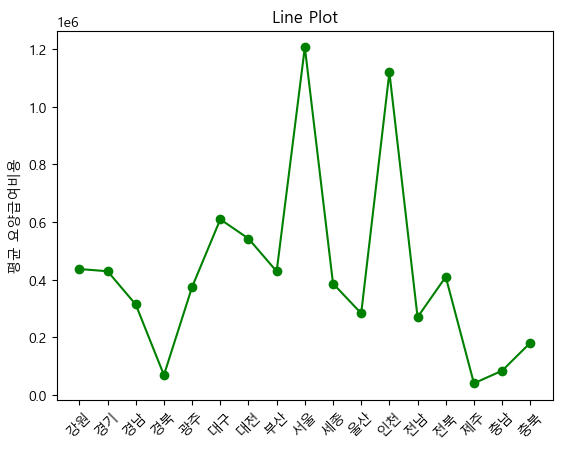

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('obesity2023_2.csv', encoding='euc-kr')

data['평균비용'] = data['요양급여비용총액'] / data['환자수']

avg = data.groupby('시도')['평균비용'].mean()

regions = avg.index
avg_costs = avg.values

print("\nindex (시도):", avg.index)  
print("values (평균비용):", avg.values)

plt.plot(regions, avg_costs, marker='o', color='green')
plt.title('지역별 평균 1인당 요양급여비용')
plt.xticks(rotation=45)
plt.ylabel('평균 요양급여비용')
plt.show()

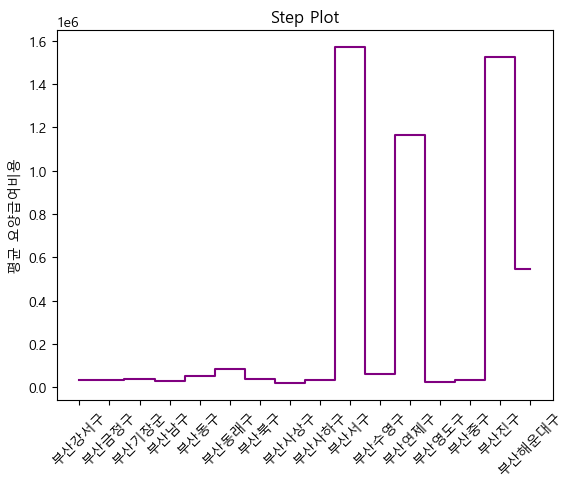

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('obesity2023_2.csv', encoding='euc-kr')

data['평균비용'] = data['요양급여비용총액'] / data['환자수']


input_region = input("시도를 입력하세요 (예: 부산): ")

filtered_data = data[data['시도'] == input_region]

if filtered_data.empty:
    print(f"입력한 시도 '{input_region}'에 해당하는 데이터가 없습니다.")
else:
   
    AVG = filtered_data.groupby('시군구')['평균비용'].mean()

    
    districts = AVG.index
    avg_costs = AVG.values

   
    plt.step(districts, avg_costs, where='mid', color='purple')
    plt.title('지역별 평균 1인당 요양급여비용')
    plt.xticks(rotation=45)
    plt.ylabel('평균 요양급여비용')
    plt.show()